# Home Loan Data Analysis 

## Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('home_loan_approval_dataset.csv')        #Load the dataset
pd.set_option('display.max_columns', None)                #allows to print all the columns in the table
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [4]:
data.shape

(307511, 122)

In [5]:
data.info(verbose=True)                 #Prints the data type of all the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

#### The dataset contains numerous columns that do not contribute to the model's predictions. Therefore, we can eliminate these columns and retain only the essential ones in the new dataset.

In [7]:
df=data.drop(['SK_ID_CURR','NAME_TYPE_SUITE','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
              'OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
              'APARTMENTS_MODE', 'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
              'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
              'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
              'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
              'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
              'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [8]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,Block,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,Laborers,1.0,2,2,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape            # The new dataset contains only 67 columns from the previous dataset containing 122

(307511, 67)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [11]:
df.isnull().sum()[df.isnull().sum()>0]       # Checks the columns which has missing values in them and their missing quantity

AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ELEVATORS_AVG                  163891
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
FLOORSMIN_AVG                  208642
LANDAREA_AVG                   182590
LIVINGAPARTMENTS_AVG           210199
LIVINGAREA_AVG                 154350
NONLIVINGAPARTMENTS_AVG        213514
NONLIVINGAREA_AVG              169682
HOUSETYPE_MODE                 154297
WALLSMATERIAL_MODE             156341
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_S

In [12]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()        # Prints the number of columns which has categorical values in them.
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

### Categorical variables must be converted into numeric form so that deep learning models—even more than traditional ML—can learn meaningful patterns without being misled by artificial numeric relationships.

In [13]:
#Frequency encoding is performed here

for col in cat_cols:
    freq_series = df[col].value_counts()  # Count of each category
    df[f"{col}_freq"] = df[col].map(freq_series).fillna(0).astype(int)

# Remove original categorical columns
df.drop(columns=cat_cols, inplace=True, errors='ignore')

In [14]:
df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,NAME_INCOME_TYPE_freq,NAME_EDUCATION_TYPE_freq,NAME_FAMILY_STATUS_freq,OCCUPATION_TYPE_freq,ORGANIZATION_TYPE_freq,HOUSETYPE_MODE_freq,WALLSMATERIAL_MODE_freq
0,1,0,202500.0,406597.5,24700.5,351000.0,1.0,2,2,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278232,105059,202924,213312,158774,218391,45444,55186,67992,150503,64815
1,0,0,270000.0,1293502.5,35698.5,1129500.0,2.0,1,1,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278232,202448,202924,94199,21703,74863,196432,27570,8893,150503,9253
2,0,0,67500.0,135000.0,6750.0,135000.0,1.0,2,2,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29279,105059,104587,213312,158774,218391,45444,55186,10404,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,2.0,2,2,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278232,202448,202924,213312,158774,218391,29775,55186,67992,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,1.0,2,2,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,278232,105059,202924,213312,158774,218391,45444,27570,85,0,0


## MICE IMPUTATION METHOD

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_array = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_array, columns=df.columns)

df_imputed.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,NAME_INCOME_TYPE_freq,NAME_EDUCATION_TYPE_freq,NAME_FAMILY_STATUS_freq,OCCUPATION_TYPE_freq,ORGANIZATION_TYPE_freq,HOUSETYPE_MODE_freq,WALLSMATERIAL_MODE_freq
0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278232.0,105059.0,202924.0,213312.0,158774.0,218391.0,45444.0,55186.0,67992.0,150503.0,64815.0
1,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,0.406839,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278232.0,202448.0,202924.0,94199.0,21703.0,74863.0,196432.0,27570.0,8893.0,150503.0,9253.0
2,0.0,0.0,67500.0,135000.0,6750.0,135000.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409973,0.555912,0.729567,0.109141,0.059505,0.964790,0.655738,0.032923,0.054638,0.102554,0.158839,0.155100,0.051668,0.091208,0.081649,0.009437,0.037756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29279.0,105059.0,104587.0,213312.0,158774.0,218391.0,45444.0,55186.0,10404.0,0.0,0.0
3,0.0,0.0,135000.0,312682.5,29686.5,297000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513467,0.650442,0.539921,0.109367,0.059281,0.965753,0.647730,0.032657,0.052829,0.101542,0.157468,0.147512,0.052993,0.092353,0.080606,0.008477,0.037936,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278232.0,202448.0,202924.0,213312.0,158774.0,218391.0,29775.0,55186.0,67992.0,0.0,0.0
4,0.0,0.0,121500.0,513000.0,21865.5,513000.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.351319,0.322738,0.502966,0.102360,0.058690,0.962703,0.665503,0.034377,0.048905,0.100512,0.136382,0.125730,0.047074,0.086326,0.076840,0.010465,0.040037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278232.0,105059.0,202924.0,213312.0,158774.0,218391.0,45444.0,27570.0,85.0,0.0,0.0


 - MICE is used in home loan data because it provides nuanced, statistically sound imputations by modeling each feature using others, supporting different data types, and preserving the underlying data patterns better than simple fixes like mean imputation.

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
CNT_FAM_MEMBERS                     2
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ELEVATORS_AVG                  163891
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
FLOORSMIN_AVG                  208642
LANDAREA_AVG                   182590
LIVINGAPARTMENTS_AVG           210199
LIVINGAREA_AVG                 154350
NONLIVINGAPARTMENTS_AVG        213514
NONLIVINGAREA_AVG              169682
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
dtype: int64

#### Even after using MICE method there are some missing values.

- MICE only fills in missing values for variables included in the imputation model. If certain columns were excluded—perhaps because they were constant, highly collinear, or intentionally omitted—they won’t get imputed.

- Some variables may still have missing values if the data doesn’t provide enough information to predict them accurately.

## Print the percentage of default to a payer of the dataset for the TARGET column

In [17]:
df.TARGET.value_counts()       #counts the number of variables in the "TARGET" column

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [18]:
total_count = df.TARGET.shape[0]
defaulter_target = (df['TARGET'] == 0).sum()
default_percentage=(defaulter_target/total_count)*100

print(f"Defaults (TARGET=0): {defaulter_target} out of {total_count} ({default_percentage:.2f}%)")


Defaults (TARGET=0): 282686 out of 307511 (91.93%)


 - It is evident that the "TARGET" column exhibits a high degree of imbalance. The occurrence of "0" is approximately 91.93%. This implies that the data can be overfitted to a high degree. In order to avert overfitting, we must balance the "TARGET" column by either under sampling or oversampling.

# Balance the dataset if the data is imbalanced 

In [19]:
df_rows_clean = df_imputed.dropna(axis=0, how='any')
df_clean = df_rows_clean.dropna(axis=1, how='any')
df_clean.shape

(307511, 67)

 - A dataset that needs to be balanced should not have any missing data. This means we are retaining only those rows & columns that contain no missing values.

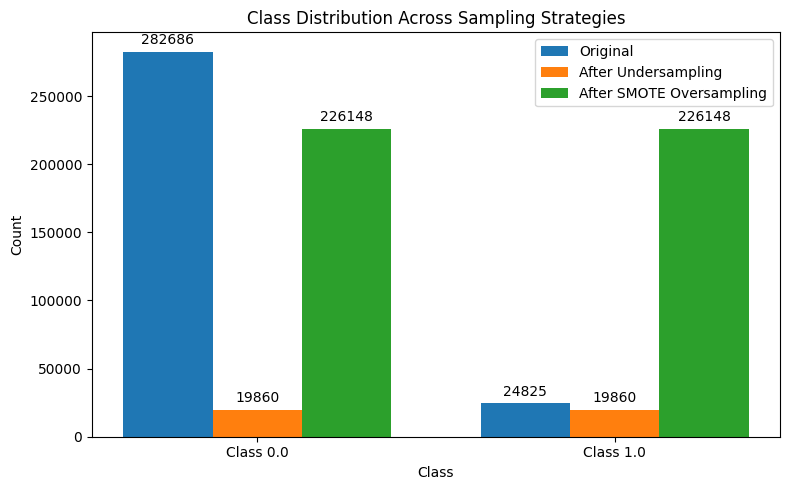

In [20]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


x = df_clean.drop(columns='TARGET')
y = df_clean['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)


# Count distributions
orig_counts = y.value_counts().sort_index()           # original full dataset

rus_x,rus_y=RandomUnderSampler(random_state=42).fit_resample(x_train, y_train)
rus_counts = rus_y.value_counts().sort_index()

ros_x,ros_y=SMOTE(random_state=42).fit_resample(x_train, y_train)
smote_counts = ros_y.value_counts().sort_index()

# Setup bar chart
categories = orig_counts.index.tolist()                # [0, 1]
labels = [f'Class {i}' for i in categories]            
x_positions = np.arange(len(categories))               # [0, 1]
bar_width = 0.25                                       # width for each bar

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars side-by-side with offsets
rects1 = ax.bar(x_positions - bar_width, orig_counts.values, width=bar_width, label='Original')
rects2 = ax.bar(x_positions, rus_counts.values, width=bar_width, label='After Undersampling')
rects3 = ax.bar(x_positions + bar_width, smote_counts.values, width=bar_width, label='After SMOTE Oversampling')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Across Sampling Strategies')
ax.set_xticks(x_positions)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()

#### This grouped chart gives a clear, comparative view of how class distributions shift across your preprocessing strategies:
 
 - Left bars (offset left): original data distribution
 
 - Center bars: after undersampling

 - Right bars (offset right): after SMOTE

## Creating a Deep Learning model using the "undersampled" dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(rus_x,
                                                    rus_y, 
                                                    test_size=0.2, 
                                                    stratify=rus_y, 
                                                    random_state=42)


input_dim=x_train.shape[1]
input_dim

model=keras.Sequential([
        keras.layers.Dense(input_dim,activation='relu',input_shape=(input_dim,)),       #input layer
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50,activation='relu'),      #hidden layer
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1,activation='sigmoid')     #output layer
                ])

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from tensorflow.keras.callbacks import EarlyStopping     #Using EarlyStopping method to reduce time and space

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, 
          y_train, 
          epochs=50, 
          batch_size=256, validation_split=0.1, 
          callbacks=[early_stopping], 
          verbose=1)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5232 - loss: 0.7929 - val_accuracy: 0.5576 - val_loss: 0.6878
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 0.7318 - val_accuracy: 0.5736 - val_loss: 0.6813
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5436 - loss: 0.7062 - val_accuracy: 0.5812 - val_loss: 0.6805
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5512 - loss: 0.6922 - val_accuracy: 0.5853 - val_loss: 0.6804
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 0.6861 - val_accuracy: 0.5840 - val_loss: 0.6799
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 0.6803 - val_accuracy: 0.5862 - val_loss: 0.6790
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5738 - loss: 0.6787 - val_accuracy: 0.5887 - val_loss: 0.6784
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5783 - loss: 0.6757 - val_accuracy: 0.

In [24]:
print(f"Model Evaluation for Train dataset: {model.evaluate(x_train,y_train)}")
print(f"Model Evaluation for Test dataset: {model.evaluate(x_test,y_test)}")

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5995 - loss: 0.6692
Model Evaluation for Train dataset: [0.6691952347755432, 0.5995405316352844]
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5947 - loss: 0.6701
Model Evaluation for Test dataset: [0.6700870990753174, 0.5946626663208008]


In [25]:
results = model.evaluate(x_test, y_test)
print("Test sensitivity (recall):", results[1])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5947 - loss: 0.6701
Test sensitivity (recall): 0.5946626663208008


In [26]:
y_pred_probs = model.predict(x_test)

y_pred_probs = y_pred_probs.ravel()    # Ensure it's a vector if shape is (n_samples, 1)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### ROC CURVE for Undersampled dataset

ROC AUC Score: 0.6304101647078391


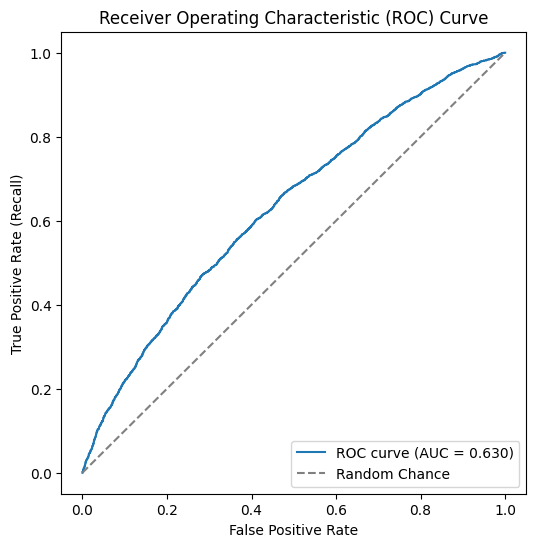

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC Score:", auc_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Creating a Deep Learning model using the "Oversampled or SMOTE" dataset

In [28]:
x_train, x_test, y_train, y_test = train_test_split(ros_x,
                                                    ros_y, 
                                                    test_size=0.2, 
                                                    stratify=ros_y, 
                                                    random_state=42)


input_dim=x_train.shape[1]
input_dim

model=keras.Sequential([
        keras.layers.Dense(input_dim,activation='relu',input_shape=(input_dim,)),       #input layer
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50,activation='relu'),      #hidden layer
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1,activation='sigmoid')     #output layer
                ])

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, 
          y_train, 
          epochs=50, 
          batch_size=256, validation_split=0.1, 
          callbacks=[early_stopping], 
          verbose=1)

Epoch 1/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5674 - loss: 0.6912 - val_accuracy: 0.5983 - val_loss: 0.6717
Epoch 2/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5926 - loss: 0.6685 - val_accuracy: 0.6039 - val_loss: 0.6680
Epoch 3/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5984 - loss: 0.6649 - val_accuracy: 0.6037 - val_loss: 0.6653
Epoch 4/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6044 - loss: 0.6612 - val_accuracy: 0.6104 - val_loss: 0.6641
Epoch 5/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6055 - loss: 0.6607 - val_accuracy: 0.6094 - val_loss: 0.6654
Epoch 6/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6092 - loss: 0.6586 - val_accuracy: 0.6132 - val_loss: 0.6669
Epoch 7/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6100 - loss: 0.6570 - val_accuracy: 0.6168 - val_loss: 0.6662
Epoch 8/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6092 - loss: 0.6576 - 

In [31]:
print(f"Model Evaluation for Train dataset: {model.evaluate(x_train,y_train)}")
print(f"Model Evaluation for Test dataset: {model.evaluate(x_test,y_test)}")

11308/11308 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6318 - loss: 0.6511
Model Evaluation for Train dataset: [0.6510655879974365, 0.6317558288574219]
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6315 - loss: 0.6470
Model Evaluation for Test dataset: [0.6469793319702148, 0.6314835548400879]


In [32]:
results = model.evaluate(x_test, y_test)
print("Test sensitivity (recall):", results[1])

2827/2827 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6315 - loss: 0.6470
Test sensitivity (recall): 0.6314835548400879


In [33]:
y_pred_probs = model.predict(x_test)
# Ensure it's a vector if shape is (n_samples, 1)
y_pred_probs = y_pred_probs.ravel()

2827/2827 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step


### ROC CURVE for Oversampled dataset

ROC AUC Score: 0.683116466069778


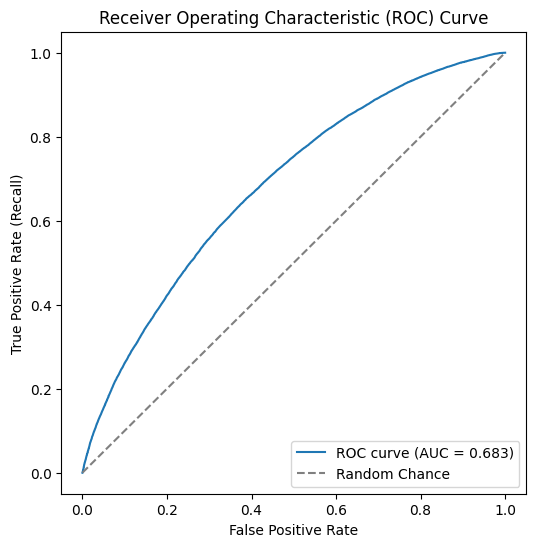

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC Score:", auc_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KEY TAKEAWAY:

### Dataset and Data Preparation

 - Initially, the dataset included approximately 300,000 rows and 122 columns. After exploratory data analysis (EDA), only the essential features were retained.

 - A significant number of missing values remained. The MICE (Multiple Imputation by Chained Equations) method was chosen for its suitability, though it filled only a portion of them.

 - The target variable (TARGET) exhibited a severe imbalance. To correct this, both undersampling and oversampling strategies were applied. It’s important to note that the dataset must contain no missing values before balancing.


### Model Development and Evaluation

 - Two deep learning models were trained: one on the undersampled data, the other on data balanced using SMOTE.

 - Both models achieved similar accuracy, differing by only around 3%.

 - The SMOTE-trained model achieved approximately 63.15% accuracy on the test set.

 - The undersampled model reached about 59.47% accuracy.

 - ROC curves confirmed this performance gap: the SMOTE model’s AUC was approximately 68.3%, compared to 63% for the undersampled model.

### Conclusion

 - Rather than relying on assumptions, it is always best to empirically train and evaluate models. In this case, the SMOTE-balanced model clearly yielded better predictive performance while maintaining balance across classes.

